## X-ray tomography - Part 2

You may need to install the following library to work with this code.

In [1]:
# pip install torch #TODO: is it necessary?

We begin by loading the libraries you will require later on for your calculations.

In [2]:
# import required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ImportError: cannot import name 'test_simulation' from 'torch' (c:\Users\carst\Unibox Rostock\repositories\DADM_lecture_STMC\.venv\Lib\site-packages\torch\__init__.py)

### Exercise 1

The following cell imports a function to simulate the forward propagation of the X-rays following interaction with an object using the Fresnel propagator.  

__*** Please note, that this function test_simulation.py does not fall under the MIT license and may not be shared outside this course. ***__

Vary the inputs z01 and z02 (in nm) which relate the the SOD and SDD in the lecture for cone-beam imaging and see how the propagated image changes. Plot the object for comparison. Comment your observations.

#### Solution

If we use the provided code and enter different SOD and SDD, we note that with increasing z02 and constant z01 we have stronger fringes extending farther from our original object. This is due to the increase in interference due to the extended propagation distance. The same occurs if we decrease z01 and keep z02 constant because the sample-to-detector distance effectively increases.

In [3]:
import test_simulation #FIXME: What is test_simulation?
z01 = 5 * 1e7   # nm = 10cm
z02 = 20 * 1e9   # nm = 20m

holo, obj= test_simulation.forward_propagation_holo(z01,z02)
plt.imshow(holo)
plt.show()

ModuleNotFoundError: No module named 'test_simulation'

### Exercise 2

Aluminum, Beryllium and lithium are typical materials for compound refractive lenses (CRLs). Use the database available [here](https://henke.lbl.gov/optical_constants/getdb2.html) to determine the minimum number $N$ of lenses required to attain a focal length $f$ = 1 m of the CRLS at photon energies between 5 and 30 keV, assuming that the apex radius is $r=5$ µm. You may assume that the focal length $f=\frac{r}{2 \delta N}$.

#### Solution

The number of required lenses can be derived using the following formula $$N=\frac{r}{2f\delta}$$ where $r$ is the radius at apex and $f$ the desired maximum focal length. $\delta$ the real refractive index increment relates to the phase shift of the different materials and can be taken from the database. Clearly, for different photon energies, different numbers of lenses are required. To correctly solve the exercise, we need to keep in mind that only integer numbers of lenses are physically sensible. This exercise can be solved in Python, see the following code:

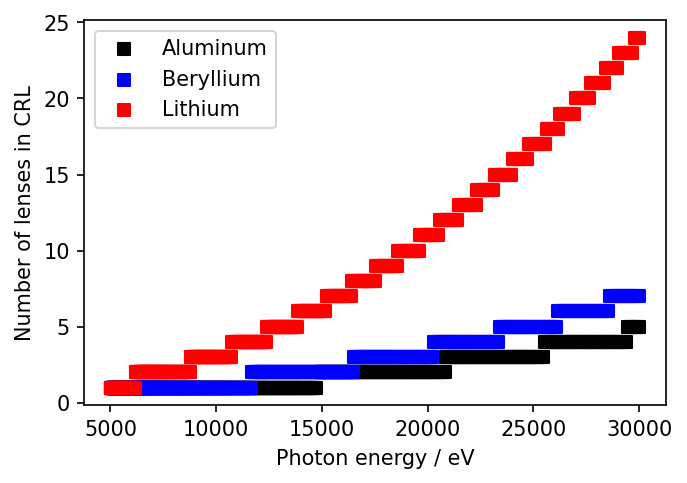

In [4]:
data_al=pd.read_csv('Al.txt',header=2, sep=' ', usecols=[2,4,6], names=['Energy /eV','Delta','Beta'])
data_be=pd.read_csv('Be.txt',header=2, sep=' ', usecols=[2,4,6], names=['Energy /eV','Delta','Beta'])
data_li=pd.read_csv('Li.txt',header=2, sep=' ', usecols=[2,4,6], names=['Energy /eV','Delta','Beta'])

f=1 # focal length in m
r=5*10**(-6) # radius at apex in m

N_al=np.ceil(r/(f*2*data_al.iloc[:,1]))
N_be=np.ceil(r/(f*2*data_be.iloc[:,1]))
N_li=np.ceil(r/(f*2*data_li.iloc[:,1]))

E = data_al.iloc[:,0]
my_dpi=150
plt.figure(figsize=(750/my_dpi,500/my_dpi),dpi=my_dpi)
plt.scatter(E,N_al,c='black',marker='s',label='Aluminum')
plt.scatter(E,N_be,c='blue',marker='s',label='Beryllium')
plt.scatter(E,N_li,c='red',marker='s',label='Lithium')
plt.xlabel('Photon energy / eV')
plt.ylabel('Number of lenses in CRL')
plt.legend()
plt.tight_layout
plt.show()